In [1]:
# s metaheuristike

In [2]:
# def local_search_first_improvement(s, operator):
#     improved = True
#     while improved:
#         improved = False
#         changes = all_changes(s, operator)
#         changes = shuffle(changes)
#         for change in changes:
#             s_new = apply(s, change)
#             if obj(s_new) < obj(s):
#                 improved = True
#                 s = s_new
#                 break

In [3]:
from uflp_utils import read_instance, read_bk_instance

In [4]:
user_cost, resource_cost = read_instance('../2022_2023/live/03_s_metaheuristics/uflp1.txt')

In [5]:
import numpy as np

In [6]:
user_cost = np.array(user_cost)
resource_cost = np.array(resource_cost)
user_cost, resource_cost

(array([[ 1, 12,  3],
        [ 2,  7, 41],
        [19, 21,  7]]),
 array([12, 11, 13]))

In [7]:
from uflp_utils import objective

In [8]:
s = np.array([True, False, True])
obj = objective(s, user_cost, resource_cost)
obj

np.int64(35)

In [9]:
def local_search_first_improvement(s: np.ndarray, obj: int, user_cost: np.ndarray, resource_cost: np.ndarray) -> tuple[np.ndarray, int]:
    improved = True
    while improved:
        improved = False
        for i in range(len(s)):
            s[i] = not s[i]
            obj_new = objective(s, user_cost, resource_cost)
            if obj_new < obj:
                obj = obj_new
                improved = True
                break
            else:
                s[i] = not s[i]
    return s, obj

In [10]:
s_new, obj = local_search_first_improvement(s, obj, user_cost, resource_cost)
s_new, obj

(array([ True, False, False]), np.int64(34))

In [11]:
# za domaci:
# 1. best improvement + flip
# 2. best improvement + swap
# 3. first improvement + swap
# 4. smislite idealan nacin za polaganje ispita na matf-u

In [12]:
import random


def shaking(s: np.ndarray, k: int):
    new_s = s.copy()
    idx = random.sample(range(len(s)), k)
    new_s[idx] = 1 - new_s[idx]
    return new_s

In [13]:
def stop_condition(iter: int, max_iter: int) -> bool:
    return iter >= max_iter

In [15]:
def initialize(num_resources: int) -> np.ndarray:
    s = np.random.randint(0, 2, size=num_resources)
    return s

In [20]:
from matplotlib import pyplot as plt


def vns(user_cost: np.ndarray, resource_cost: np.ndarray, k_min: int, k_max: int, move_prob: float, stop_condition: callable, max_iter: int):
    s = initialize(num_resources=len(resource_cost))
    obj = objective(s, user_cost, resource_cost)

    values = []
    it = 0
    while not stop_condition(it, max_iter):
        it += 1
        for k in range(k_min, k_max):
            s_new = shaking(s, k)
            obj_new = objective(s_new, user_cost, resource_cost)
            s_new, obj_new = local_search_first_improvement(s_new, obj_new, user_cost, resource_cost)
            if obj_new < obj or (obj_new == obj and random.random() < move_prob):
                obj = obj_new
                s = s_new
                break
        values.append(obj)

    plt.plot(values)
        
    return s, obj

(array([1, 0, 0]), np.int64(34))

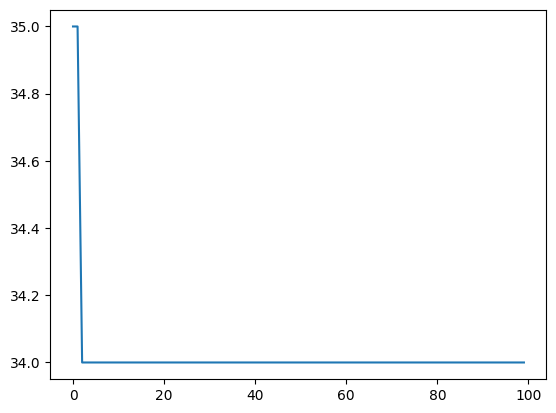

In [22]:
vns(user_cost=user_cost, resource_cost=resource_cost, k_min=1, k_max=3, move_prob=0.5, stop_condition=stop_condition, max_iter=100)

In [23]:
user_cost, resource_cost = read_bk_instance('BildeKrarup/B/B1.1')

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0]),
 np.int64(23468))

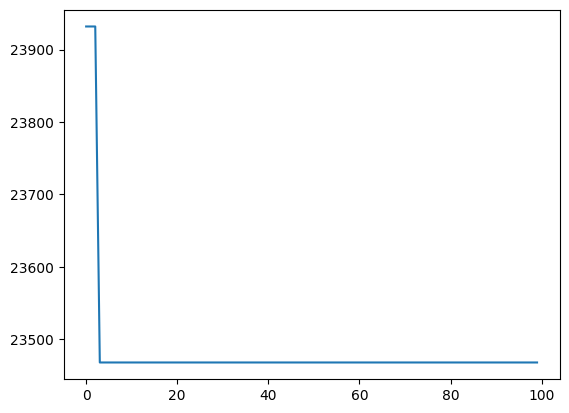

In [24]:
vns(user_cost=user_cost, resource_cost=resource_cost, k_min=1, k_max=3, move_prob=0.5, stop_condition=stop_condition, max_iter=100)

In [25]:
def simulated_annealing(user_cost: np.ndarray, resource_cost: np.ndarray, max_iters: int):
    s = initialize(len(resource_cost))
    value = objective(s, user_cost, resource_cost)

    s_best = s.copy()
    value_best = value

    values = []
    values_best = []
    
    for it in range(max_iters):
        s_new = shaking(s, k=1)
        value_new = objective(s_new, user_cost, resource_cost)
        if value_new < value:
            s = s_new
            value = value_new
            if value_new < value_best:
                value_best = value
                s_best = s_new
        else:
            p = 1 / (it + 2)
            # za domaci: smanjivanje verovatnoce na osnovu broja iteracija u istom resenju
            r = random.random()
            if r < p:
                s = s_new
                value = value_new

        values.append(value)
        values_best.append(value_best)

    plt.plot(values)
    plt.plot(values_best)

    return s_best, value_best

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0]),
 np.int64(23468))

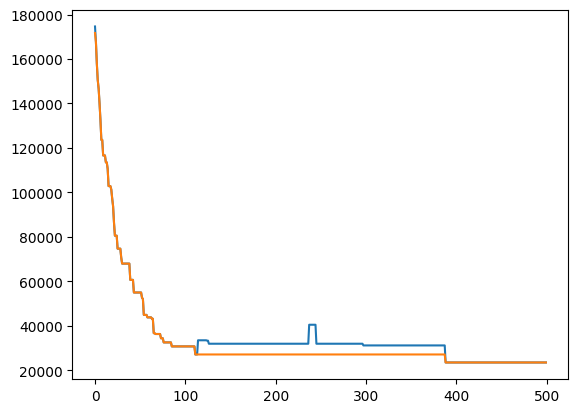

In [26]:
simulated_annealing(user_cost, resource_cost, max_iters=500)

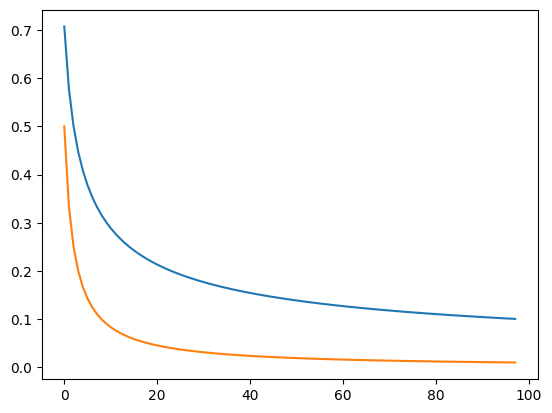

In [27]:
plt.plot(1 / np.arange(2, 100) ** 0.5)
plt.plot(1 / np.arange(2, 100))

In [ ]:
# za domaci: iterated local search
# s = initialize()
# while not stop_condition():
#     destroy(s)
#     repair(s)